<h1 align = "center"> Classification using Logistic Regression, Decision trees and Random Forests</h1>
    <ul> 
        In this project, main focus is on classification of target variable "subscribed" using three methods viz. Logistic Regression, Decision Trees and Random Forests Algorithm</ul>

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
#ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#filepath for the train dataset
file_train = "D:/Python_DataScience/pandas-demo/Project 2/train_pro2.csv"
# reading the file 
df = pd.read_csv(file_train)

In [3]:
#printing the first five rows of the data
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
# looking out for null values and dtypes of various variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 3.1+ MB


In [5]:
# printing some descriptive statistics for the continuous variable
df.describe().head(5)

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000


In [6]:
# making dummies for the required categorical variables
dummies = pd.get_dummies(df[["job","marital","education","default","housing","loan","contact","poutcome","subscribed"]], prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)
dummies.head(5)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,subscribed_yes
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [7]:
# concatenating only the required continuous variables with the dummified categorical variables and naming that as step1
step1 = pd.concat([df[["age","balance","duration","campaign","pdays","previous"]],dummies], axis=1)
step1.head(5)

# dropping the target variable "subscribed_yes"
step2 = step1.drop(["subscribed_yes"],axis = 1)

# assigning the target variable to y
y = step1["subscribed_yes"]

# splitting the dataset into test and train datasets 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(step2, y, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 4748
number of training samples: 26899


### Logistic Regression Model

In [8]:
# fitting the logistic regression model
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# predicting the values using the fitted model on the test dataset to measure the performance
prediction = lreg.predict(x_test)
from sklearn.metrics import accuracy_score
print ("The accuracy of Logistic Regression Model is :" + str (accuracy_score(y_test, prediction)))

The accuracy of Logistic Regression Model is :0.8894271272114574


In [10]:
# printing the probability values in the array form
prediction_prob = lreg.predict_proba(x_test)[:,1]
prediction_prob.reshape(1,-1)

array([[0.47935621, 0.01333995, 0.08390907, ..., 0.11865513, 0.02562808,
        0.01515354]])

In [11]:
# printing the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, prediction)

array([[4057,  103],
       [ 422,  166]], dtype=int64)

In [12]:
tn,fp,fn,tp =confusion_matrix(y_test,prediction).ravel()
print("True negatives: ",tn)
print("False positives: ",fp)
print ("False negative: ",fn)
print("True positive: ",tp)

True negatives:  4057
False positives:  103
False negative:  422
True positive:  166


In [13]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4160
           1       0.62      0.28      0.39       588

    accuracy                           0.89      4748
   macro avg       0.76      0.63      0.66      4748
weighted avg       0.87      0.89      0.87      4748



In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
log_ROC_AUC1=roc_auc_score(y_test,prediction)
fpr1, tpr1, thresholds1 =roc_curve(y_test,prediction_prob)
roc_auc1=auc(fpr1,tpr1)

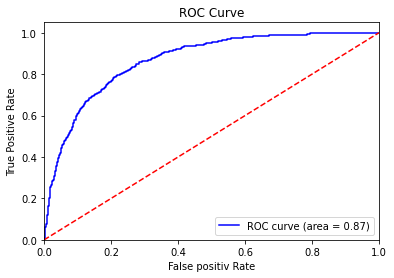

In [15]:
# plotting the ROC curve to measure the Area Under the Curve (AUC)
plt.figure()
plt.plot(fpr1,tpr1, color = "blue", label = "ROC curve (area = %0.2f)" %roc_auc1)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positiv Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "lower right")
plt.show()

It seems that the area under the curve seems good enough. Hence the model work well.

In [16]:
from sklearn.metrics import roc_curve, auc

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, prediction_prob)
roc_auc = auc(fpr,tpr)

In [18]:
print("Area under the curve is : %f" %roc_auc)

Area under the curve is : 0.867446


### Decision Trees Classifier Model

In [19]:
# importing decision trees classifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf = DecisionTreeClassifier(max_depth=4, random_state=1)

In [21]:
# fitting 
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [22]:
# predicting the values
predict1 = clf.predict(x_test)
predict1

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [23]:
print ("The accuract of the Decision Trees Model is :"+ str(accuracy_score(y_test, predict1)))

The accuract of the Decision Trees Model is :0.8949031171019377


### Random Forests Classifier Model

In [24]:
from sklearn.ensemble import RandomForestClassifier

# define model with random state as 4
rfc_model = RandomForestClassifier(random_state=4)

# fit model
rfc_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [25]:
#making predictions for the the same dataset
print("The predictions are")
predict2 = rfc_model.predict(x_test)
print(rfc_model.predict(x_test))

The predictions are
[0 0 0 ... 0 0 0]


In [26]:
print ("The accuracy of the Random Forsts Model is :" + str(accuracy_score(y_test, predict2)))

The accuracy of the Random Forsts Model is :0.8917438921651222


### Conclusion

In [27]:
print ("The accuracy of the Random Forsts Model is:" + str(accuracy_score(y_test, predict2)) +"\n"
       +"The accuract of the Decision Trees Model is :"+ str(accuracy_score(y_test, predict1))+"\n"
       +"The accuracy of Logistic Regression Model is :" + str (accuracy_score(y_test, prediction)))

The accuracy of the Random Forsts Model is:0.8917438921651222
The accuract of the Decision Trees Model is :0.8949031171019377
The accuracy of Logistic Regression Model is :0.8894271272114574


From the above data we can see that Decision Tree Model has the best accuracy and hence is the best model. 